ML
Q2

Must include in details:

  - EDA

  - Feature engineering

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
data = pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')

In [49]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [50]:
# Exploratory Data Analysis (EDA)
print("Shape of the dataset:", data.shape)
print("Columns:", data.columns)

Shape of the dataset: (13320, 9)
Columns: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [51]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [52]:
# Summary statistics
print("Summary statistics:")
print(data.describe())

Summary statistics:
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


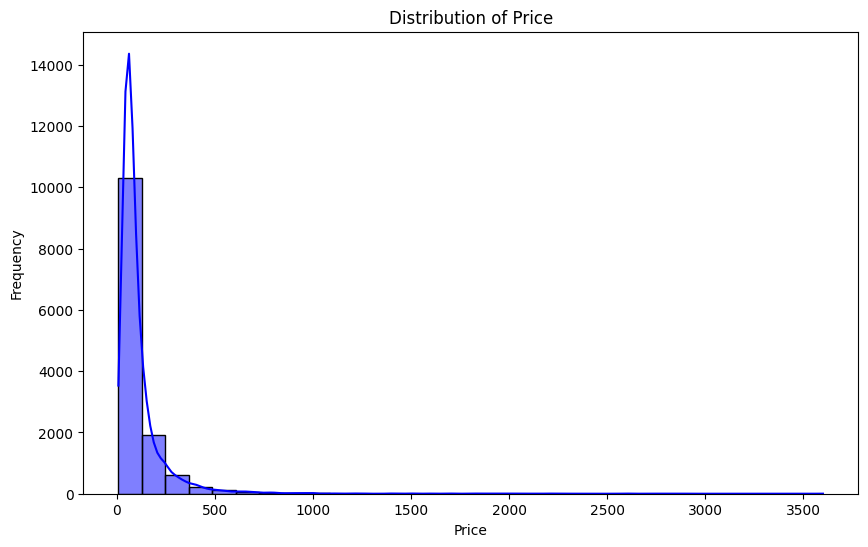

In [53]:
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-54-9056c685529e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


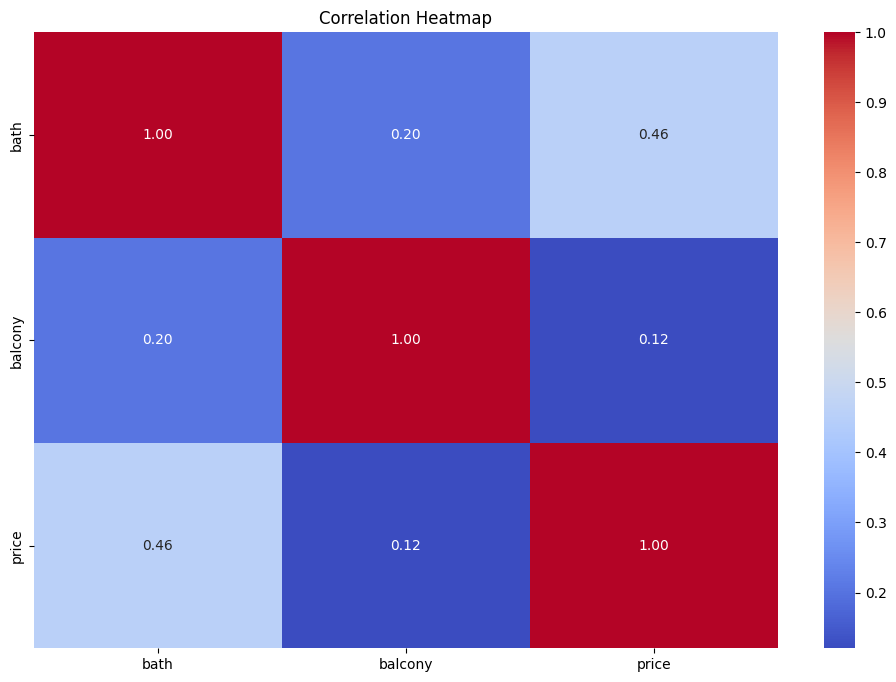

In [54]:
# Visualize the correlations between numerical features and price
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [55]:
# Feature Engineering
# Drop irrelevant features and features with too many missing values
data = data.drop(['availability', 'society', 'area_type', 'bath'], axis=1)

In [56]:
# Handle missing values
data['size'] = data['size'].fillna('2 BHK')  # Fill missing 'size' with the most common value

In [57]:
# Extract number of bedrooms from 'size' feature
data['num_bedrooms'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [58]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['location', 'size', 'balcony'], drop_first=True)

In [59]:
# Drop remaining categorical features and non-numeric columns
data = data.drop(['total_sqft', 'price'], axis=1)

In [60]:
print("Columns:", data.columns)

Columns: Index(['num_bedrooms', 'location_ Banaswadi', 'location_ Basavangudi',
       'location_ Bhoganhalli', 'location_ Devarabeesana Halli',
       'location_ Devarachikkanahalli', 'location_ Electronic City',
       'location_ Mysore Highway', 'location_ Rachenahalli',
       'location_ Sector 1 HSR Layout',
       ...
       'size_6 Bedroom', 'size_7 BHK', 'size_7 Bedroom', 'size_8 BHK',
       'size_8 Bedroom', 'size_9 BHK', 'size_9 Bedroom', 'balcony_1.0',
       'balcony_2.0', 'balcony_3.0'],
      dtype='object', length=1338)


In [61]:
# Train-test split
X = data.drop('num_bedrooms', axis=1)
y = data['num_bedrooms']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
num_bedrooms                     0
location_ Banaswadi              0
location_ Basavangudi            0
location_ Bhoganhalli            0
location_ Devarabeesana Halli    0
                                ..
size_9 BHK                       0
size_9 Bedroom                   0
balcony_1.0                      0
balcony_2.0                      0
balcony_3.0                      0
Length: 1338, dtype: int64


In [64]:
# Train SVM Regressor
svm_regressor = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel
svm_regressor.fit(X_train_scaled, y_train)

SVR()

In [65]:
# Evaluate the model
y_pred = svm_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.2213973448618405
